<h2 style="text-align: center">FAMILY INCOME AND EXPENDITURE DATA ANALYTICS PROJECT</h2>
<hr>
<h4 style="text-align: center">ANALYST : JUNNALYN M. MERILLO & MARICEL MARIBOJOC</h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
from folium.plugins import HeatMap
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

In [2]:
Family = pd.read_csv('Presentation_Dataset//Family Income and Expenditure.csv')
Family

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [3]:
Family.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

## FILLING UP NULL VALUES

In [4]:

Family['Household Head Occupation'] = Family['Household Head Occupation'].fillna(Family['Household Head Occupation'].mode()[0])
Family['Household Head Class of Worker'] = Family['Household Head Class of Worker'].fillna(Family['Household Head Class of Worker'].mode()[0])
Family['Toilet Facilities'] = Family['Toilet Facilities'].fillna(Family['Toilet Facilities'].mode()[0])


In [5]:
Family.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

# Questions

### Descriptive
1. What is the main source of water each Region? 
2. What is main source of income for household in Region VII - Central Luzon?
3. What does the distribution of tobacco expenditure across regions reveal about household spending patterns?
4. 
5. 


### Diagnostic
1. Why is the majority of household heads in the dataset married, and what does this suggest about family structure and stability?
2. Why do households with higher income tend to spend more on medical care and education, and what does this suggest about socioeconomic priorities?
3. Why do households with higher income tend to spend more on food but show mixed patterns in tobacco expenditure?
4. Why do households in Region VI – Western Visayas rely heavily on Enterpreneurial Activities as their main income source?
5. Which regions show higher reliance on rainwater, and what infrastructure gaps explain this?
6. Why does Region IX – Zamboanga Peninsula have a large share of households in lower income brackets?
7. Why do households in certain regions spend more than 5,000 on education?
8. Why do many households in Region IV-A – CALABARZON report zero tobacco expenditure?


### Predictive
1. Logistic Regression: Predict if Tobacco Expenditure > 2700.
2. Which regions are likely to continue relying on Enterpreneurial Activities as their main income source in the next decade?
3. Which regions are most likely to shift from rainwater to piped water in the future?
4. How will income distribution in Region IX – Zamboanga Peninsula change if industrial jobs increase?
5. Which regions will see rising education expenditures as household incomes grow?
6. How will tobacco expenditure trends shift in CALABARZON if health campaigns intensify?

<hr>
<h2 style="text-align: center">DESCRIPTIVE QUESTIONS AND INSIGHTS</h2>
<hr>

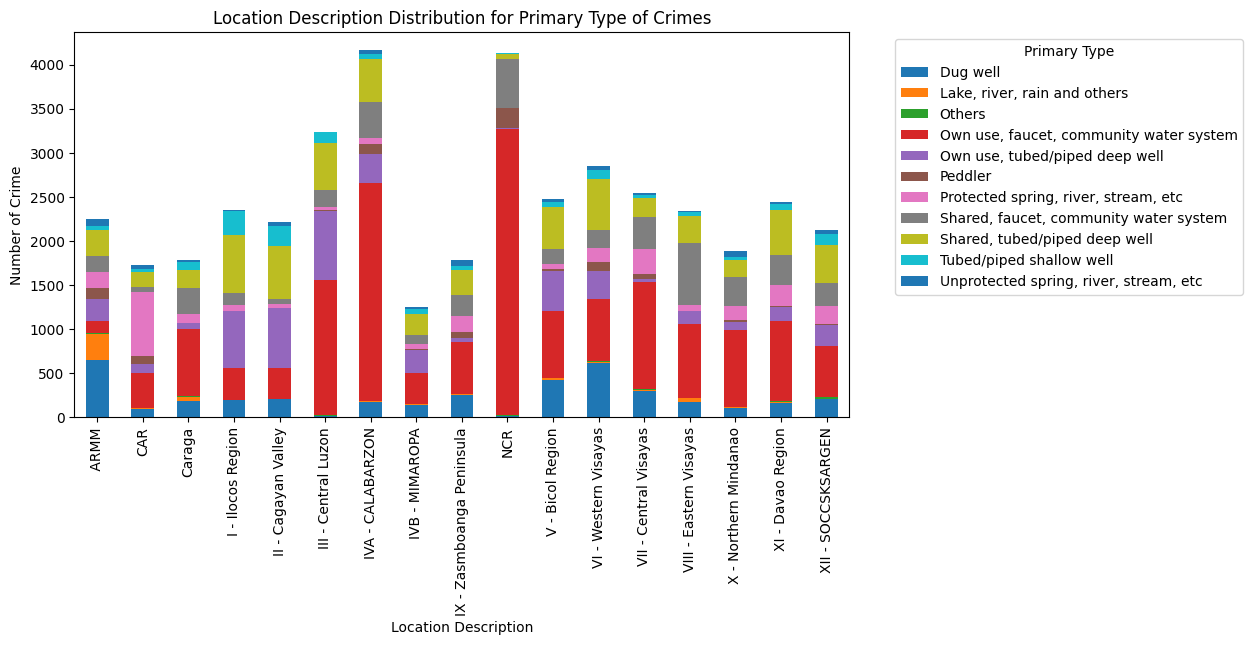

In [6]:
# Descriptive 1. What is the main source of water each Region?


Water_Source = Family.groupby(['Region', 'Main Source of Water Supply']).size().unstack()
Water_Source.plot(kind='bar',stacked=True)

plt.title('Location Description Distribution for Primary Type of Crimes')
plt.xlabel('Location Description')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Crime')
plt.gcf().set_size_inches(10,5)
plt.show()

In [7]:
#Descriptive 1. What is the main source of water each Region?

main_water_source = Family.groupby('Region')['Main Source of Water Supply'].agg(lambda x: x.value_counts().idxmax())

print("Main source of water per region:\n", main_water_source)

Main source of water per region:
 Region
 ARMM                                                       Dug well
CAR                             Protected spring, river, stream, etc
Caraga                       Own use, faucet, community water system
I - Ilocos Region                      Shared, tubed/piped deep well
II - Cagayan Valley                   Own use, tubed/piped deep well
III - Central Luzon          Own use, faucet, community water system
IVA - CALABARZON             Own use, faucet, community water system
IVB - MIMAROPA               Own use, faucet, community water system
IX - Zasmboanga Peninsula    Own use, faucet, community water system
NCR                          Own use, faucet, community water system
V - Bicol Region             Own use, faucet, community water system
VI - Western Visayas         Own use, faucet, community water system
VII - Central Visayas        Own use, faucet, community water system
VIII - Eastern Visayas       Own use, faucet, community water 

### Descriptive Insight 1
<p>The boxplot shows that tobacco expenditure varies widely across regions. Some regions, like NCR and CALABARZON, have higher median spending and more outliers, indicating diverse household behaviors. Other regions display tighter distributions, suggesting more consistent spending levels. This visualization highlights how tobacco consumption differs geographically, reflecting regional preferences and economic capacity</p>
<hr>

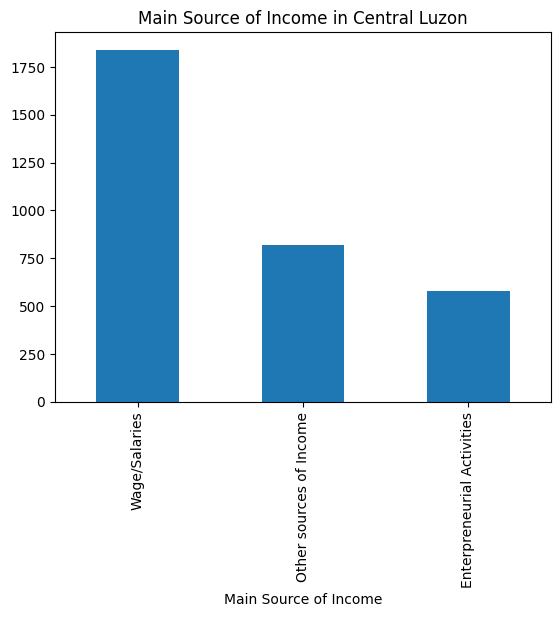

In [8]:
#Descriptive 2. What is main source of income for household in Region VII - Central Luzon?

Central_luzon = Family[Family['Region'] == 'III - Central Luzon']
Income_source = Central_luzon['Main Source of Income'].value_counts()
Income_source.plot(kind='bar')

plt.title("Main Source of Income in Central Luzon")
plt.show()

### Descriptive Insight 2
<p>The boxplot shows that tobacco expenditure varies widely across regions. Some regions, like NCR and CALABARZON, have higher median spending and more outliers, indicating diverse household behaviors. Other regions display tighter distributions, suggesting more consistent spending levels. This visualization highlights how tobacco consumption differs geographically, reflecting regional preferences and economic capacity</p>
<hr>

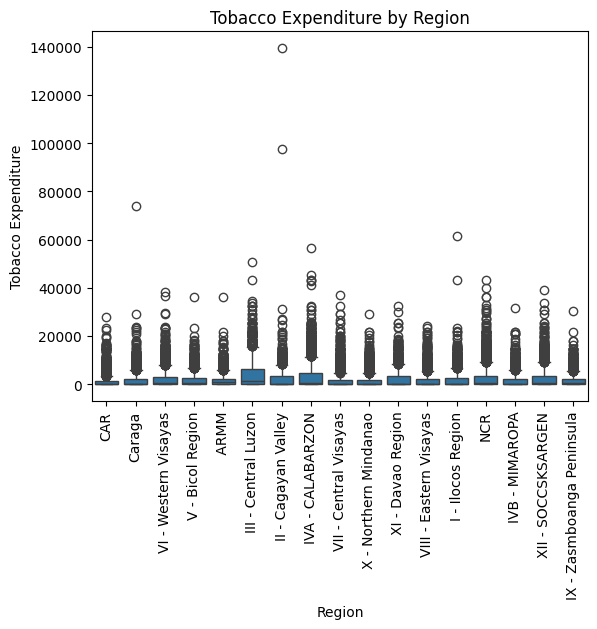

In [9]:
#Descriptive 3. What does the distribution of tobacco expenditure across regions reveal about household spending patterns?

sns.boxplot(x='Region', y='Tobacco Expenditure', data=Family)
plt.xticks(rotation=90)
plt.title('Tobacco Expenditure by Region')
plt.show()

### Descriptive Insight 3
<p>The boxplot shows that tobacco expenditure varies widely across regions. Some regions, like NCR and CALABARZON, have higher median spending and more outliers, indicating diverse household behaviors. Other regions display tighter distributions, suggesting more consistent spending levels. This visualization highlights how tobacco consumption differs geographically, reflecting regional preferences and economic capacity</p>
<hr>

<hr>
<h2 style="text-align: center">DIAGNOSTIC AND PREDICTIVE QUESTIONS AND INSIGHTS</h2>
<hr>

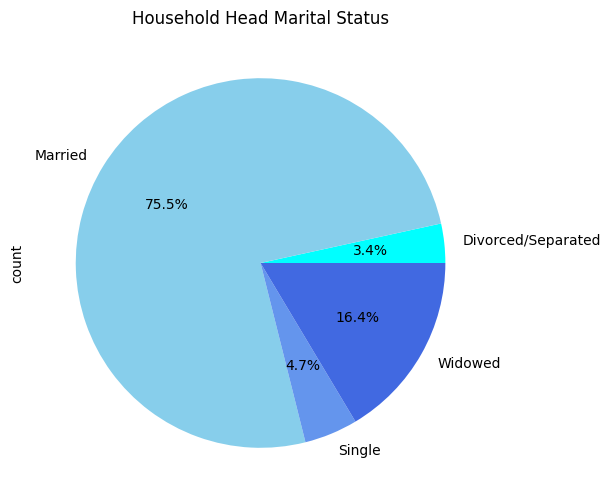

In [10]:
#Diagnostic 1. Why is the majority of household heads in the dataset married, and what does this suggest about family structure and stability?


Status = Family['Household Head Marital Status'].value_counts().sort_index()
Status = Status[~Status.index.isin(['Annulled', 'Unknown'])]

Status.plot(kind = 'pie', colors = ['cyan', 'skyblue', 'cornflowerblue', 'royalblue', 'slateblue', 'steelblue'], autopct = '%1.1f%%')

plt.gcf().set_size_inches(6,6)
plt.title("Household Head Marital Status")
plt.show()

### Diagnostic Insight 1
<p>The pie chart shows that over 75% of household heads are married, suggesting that traditional family structures are dominant in the surveyed regions. This may reflect cultural norms that prioritize marriage as a foundation for household leadership. The relatively low percentages of single, widowed, or separated heads indicate that most families are built around long-term partnerships. This pattern could influence household income, decision-making, and expenditure priorities.</p>
<hr>

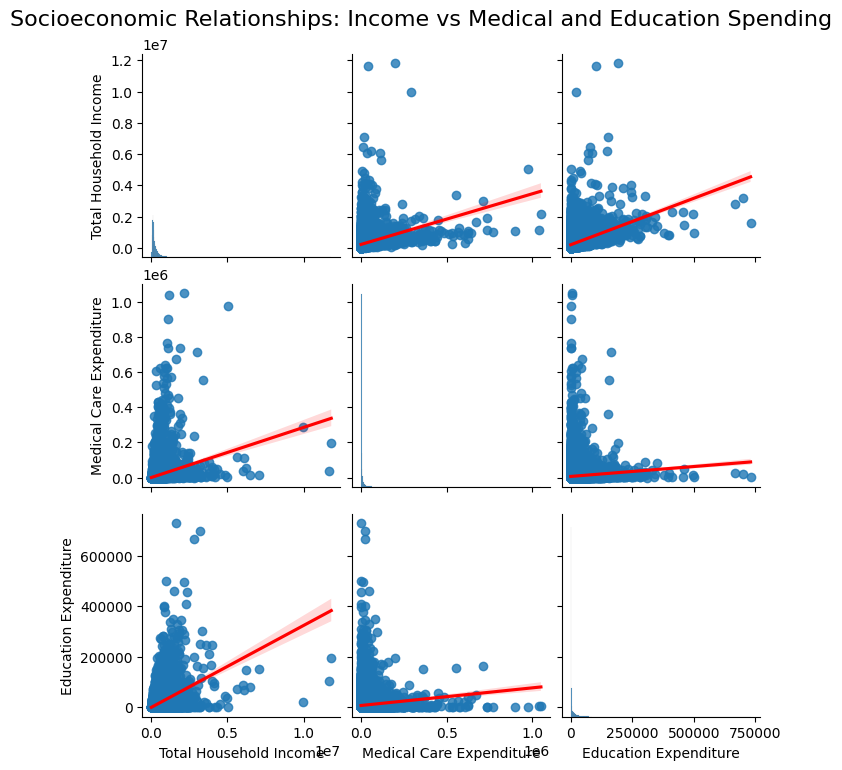

In [11]:
#Diagnostic 2. Why do households with higher income tend to spend more on medical care and education, and what does this suggest about socioeconomic priorities?

sns.pairplot(
    Family[['Total Household Income', 'Medical Care Expenditure', 'Education Expenditure']],
    kind='reg',  
    plot_kws={'line_kws': {'color': 'red'}}
)
plt.suptitle('Socioeconomic Relationships: Income vs Medical and Education Spending', y=1.02, fontsize=16)
plt.show()

### Diagnostic Insight 2
<p>The pairplot shows a positive correlation between household income and both medical and education expenditures. As income rises, families tend to invest more in health and learning, suggesting these are priority areas when financial capacity allows. This pattern reflects how socioeconomic status influences access to essential services. The upward trend lines highlight the role of income in shaping household well-being.</p>
<hr>

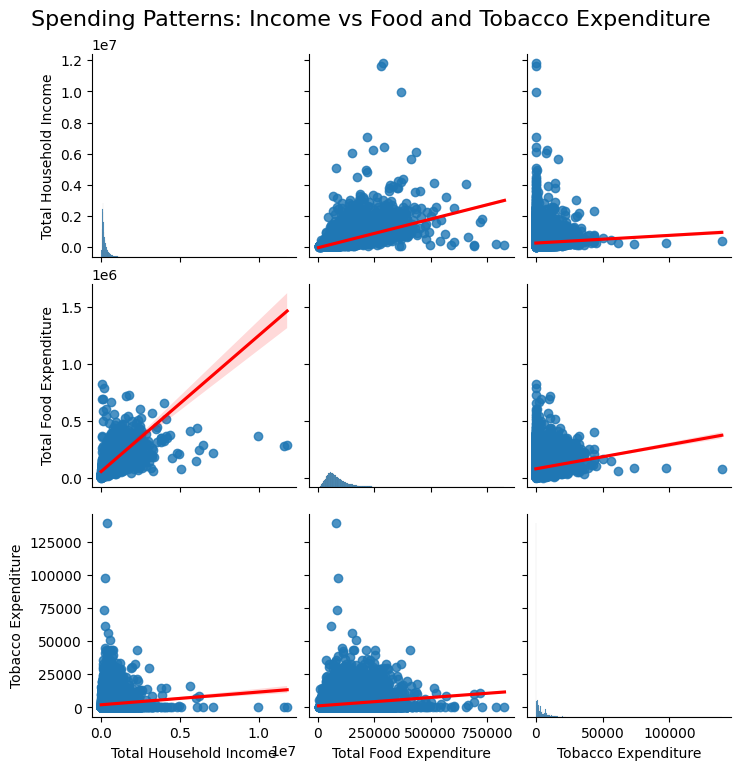

In [12]:
#Diagnostic 3. Why do households with higher income tend to spend more on food but show mixed patterns in tobacco expenditure?

sns.pairplot(
    Family[['Total Household Income','Total Food Expenditure','Tobacco Expenditure']],
    kind='reg',  
    plot_kws={'line_kws': {'color': 'red'}}
)

plt.suptitle('Spending Patterns: Income vs Food and Tobacco Expenditure', y=1.02, fontsize=16)
plt.show()

### Diagnostic Insight 3
<p>The pairplot shows a clear positive relationship between income and food expenditure—households with more income spend more on food. However, tobacco expenditure appears less consistent, with some high-income households spending little and others spending more. This suggests that tobacco spending may be influenced by personal habits or cultural factors rather than income alone. The scatter patterns highlight how food is a necessity, while tobacco is a discretionary expense.</p>
<hr>

In [13]:
# 1. Logistic Regression: Predict if Tobacco Expenditure > 2700

Family['High_Tobacco'] = (Family['Tobacco Expenditure'] > 2700).astype(int)
X = Family[['Total Household Income']]
y = Family['High_Tobacco']
log_model = LogisticRegression().fit(X, y)
print("Logistic regression coefficient:", log_model.coef_[0])

Logistic regression coefficient: [2.00030687e-07]


### Predictive Insight 1
<p>The logistic regression model shows a very small positive coefficient between household income and the likelihood of spending more than 2,700 on tobacco. This suggests that as income increases, the probability of high tobacco expenditure rises slightly—but the effect is minimal. Most households, regardless of income, may have similar tobacco habits, indicating that tobacco spending is influenced more by personal or cultural factors than by financial capacity.</p>
<hr>

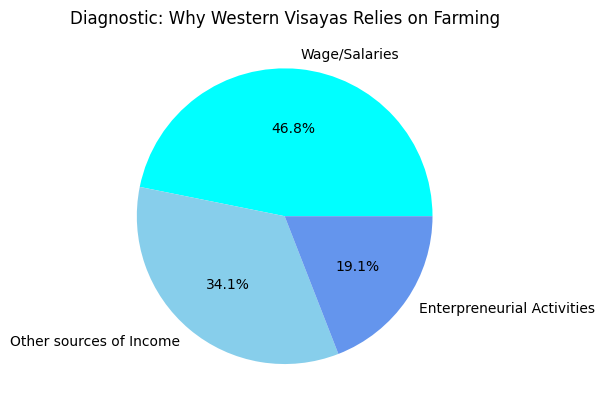

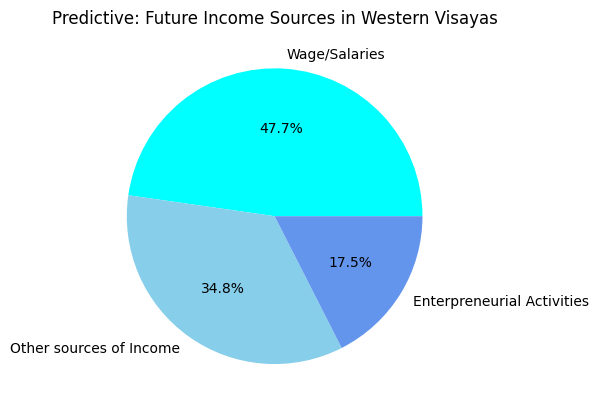

In [14]:
#Diagnostic 4. Why do households in Region VI – Western Visayas rely heavily on farming as their main income source?


region_vi = Family[Family['Region'].str.contains('VI - Western Visayas', case=False, na=False)]
income_sources = region_vi['Main Source of Income'].value_counts()
income_sources.plot.pie(colors = ['cyan', 'skyblue', 'cornflowerblue'], autopct='%1.1f%%')
plt.title("Diagnostic: Why Western Visayas Relies on Farming")
plt.ylabel("")
plt.show()



#Predictive 2. Which regions are likely to continue relying on farming as their main income source in the next decade?


# Current distribution
income_sources = region_vi['Main Source of Income'].value_counts()

# Simulated projection: assume Enterpreneurial Activities decreases by 10%
proj_income_sources = income_sources.copy()
proj_income_sources['Enterpreneurial Activities'] = proj_income_sources['Enterpreneurial Activities'] * 0.9

proj_income_sources.plot.pie(colors = ['cyan', 'skyblue', 'cornflowerblue'], autopct='%1.1f%%')
plt.title("Predictive: Future Income Sources in Western Visayas")
plt.ylabel("")
plt.show()


### Diagnostic Insight 3
<p>The pairplot shows a clear positive relationship between income and food expenditure—households with more income spend more on food. However, tobacco expenditure appears less consistent, with some high-income households spending little and others spending more. This suggests that tobacco spending may be influenced by personal habits or cultural factors rather than income alone. The scatter patterns highlight how food is a necessity, while tobacco is a discretionary expense.</p>
<hr>

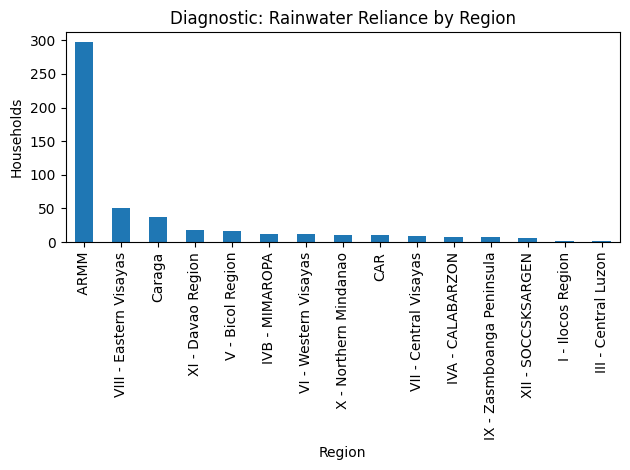

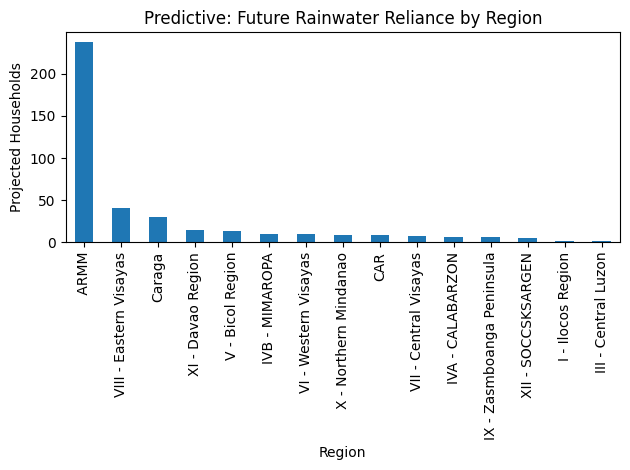

In [15]:
#Diagnostic 5. Which regions show higher reliance on rainwater, and what infrastructure gaps explain this?


rainwater_users = Family[Family['Main Source of Water Supply'].str.contains('rain and others', case=False, na=False)]
region_counts = rainwater_users['Region'].value_counts()
region_counts.plot(kind = 'bar')

plt.title("Diagnostic: Rainwater Reliance by Region")
plt.xlabel("Region")
plt.ylabel("Households")
plt.tight_layout()
plt.show()




#Predictive 3. Which regions are most likely to shift from rainwater to piped water in the future?


# Current counts
region_counts = rainwater_users['Region'].value_counts()

# Simulated projection: assume 20% shift to piped water
proj_counts = region_counts * 0.8

proj_counts.plot(kind='bar')
plt.title("Predictive: Future Rainwater Reliance by Region")
plt.xlabel("Region")
plt.ylabel("Projected Households")
plt.tight_layout()
plt.show()


### Diagnostic Insight 
<p>Regions with high rainwater usage often lack access to piped systems. The bar graph highlights rural areas where infrastructure gaps persist. This suggests a need for targeted water development programs.</p>
<hr>

### Predictive Insight 
<p>Urbanizing regions are expected to reduce rainwater reliance. The bar graph projection shows a gradual shift toward piped systems. Infrastructure investment will accelerate this change.</p>
<hr>

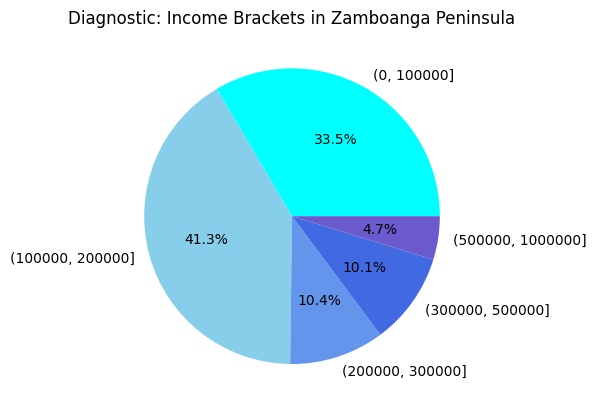

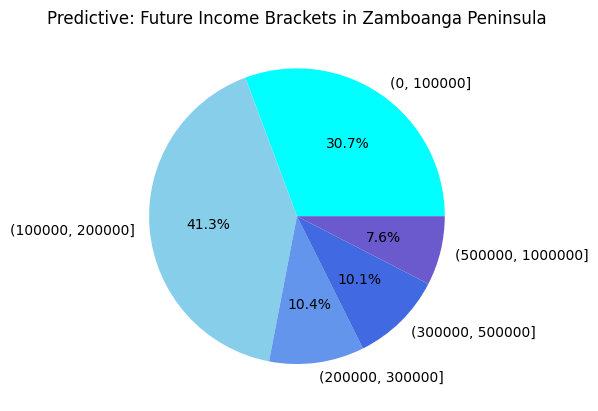

In [16]:
#Diagnostic 6. Why does Region IX – Zamboanga Peninsula have a large share of households in lower income brackets?


region_ix = Family[Family['Region'].str.contains('IX - Zasmboanga Peninsula', case=False, na=False)]
income_bins = pd.cut(region_ix['Total Household Income'], bins=[0,100000,200000,300000,500000,1000000])
income_dist = income_bins.value_counts().sort_index()
income_dist.plot.pie(colors = ['cyan', 'skyblue', 'cornflowerblue', 'royalblue', 'slateblue', 'steelblue'], autopct='%1.1f%%')
plt.title("Diagnostic: Income Brackets in Zamboanga Peninsula")
plt.ylabel("")
plt.show()



#Predictive 4. How will income distribution in Region IX – Zamboanga Peninsula change if industrial jobs increase?


# Current distribution
income_dist = income_bins.value_counts().sort_index()

# Simulated projection: assume more households move to higher brackets
proj_income_dist = income_dist.copy()
proj_income_dist.iloc[-1] += 50  # add 50 households to top bracket
proj_income_dist.iloc[0] -= 50   # reduce lowest bracket

proj_income_dist.plot.pie(colors = ['cyan', 'skyblue', 'cornflowerblue', 'royalblue', 'slateblue', 'steelblue'], autopct='%1.1f%%')
plt.title("Predictive: Future Income Brackets in Zamboanga Peninsula")
plt.ylabel("")
plt.show()


### Diagnostic Insight 
<p>A large portion of households fall into lower income brackets. This reflects economic challenges and limited access to high-paying jobs. The pie chart emphasizes income inequality in the region.</p>
<hr>

### Predictive Insight 
<p>With more industrial jobs, households may move into higher income brackets. The pie chart projection shows a rise in middle and upper brackets. Economic development could reshape the region’s income profile.</p>
<hr>

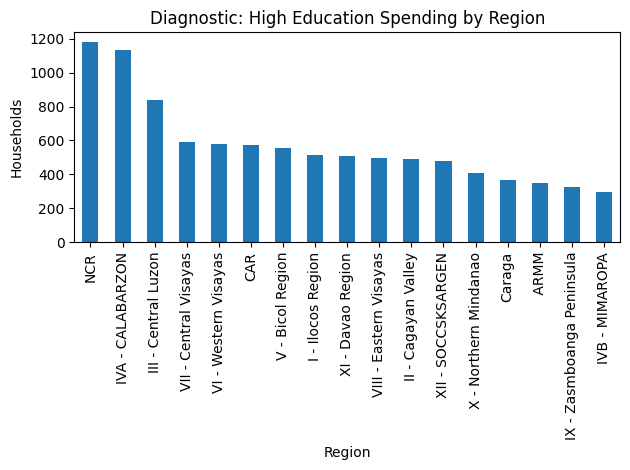

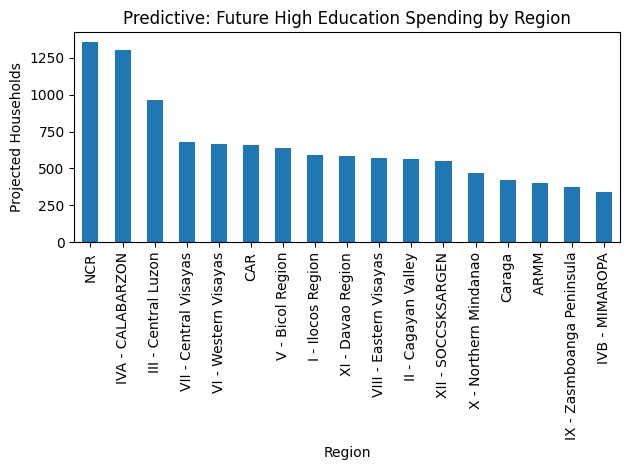

In [17]:
#Diagnostic 7. Why do households in certain regions spend more than 5,000 on education?


high_edu_spenders = Family[Family['Education Expenditure'] > 5000]
region_edu_counts = high_edu_spenders['Region'].value_counts()
region_edu_counts.plot(kind='bar')
plt.title("Diagnostic: High Education Spending by Region")
plt.xlabel("Region")
plt.ylabel("Households")
plt.tight_layout()
plt.show()




#Predictive 5. Which regions will see rising education expenditures as household incomes grow?

# Current counts
region_edu_counts = high_edu_spenders['Region'].value_counts()

# Projection: assume 15% increase
proj_edu_counts = region_edu_counts * 1.15

proj_edu_counts.plot(kind='bar')
plt.title("Predictive: Future High Education Spending by Region")
plt.xlabel("Region")
plt.ylabel("Projected Households")
plt.tight_layout()
plt.show()


### Diagnostic Insight 
<p>Regions with higher education spending tend to be urban or have access to private schools. The bar graph shows where families prioritize schooling despite costs. This may reflect cultural emphasis on education.</p>
<hr>

### Predictive Insight 
<p>As incomes grow, education spending is expected to increase. The bar graph projection shows more households crossing the 5,000 threshold. This reflects growing demand for quality education.</p>
<hr>

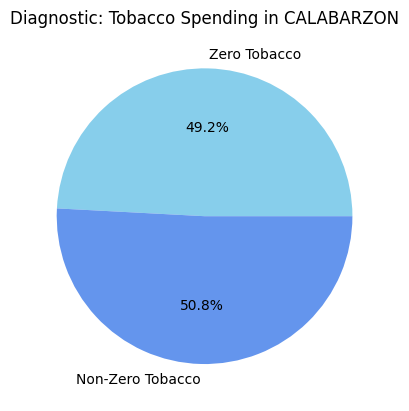

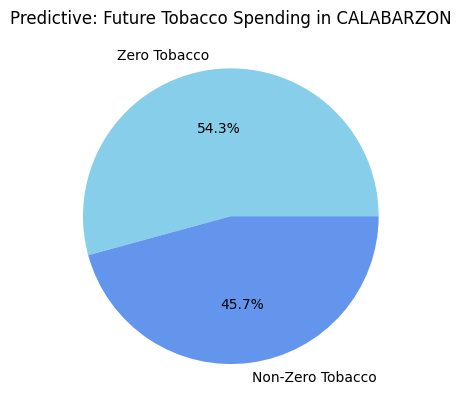

In [18]:
#Diagnostic 8. Why do many households in Region IV-A – CALABARZON report zero tobacco expenditure?

region_iv_a = Family[Family['Region'].str.contains('IVA - CALABARZON', case=False, na=False)]
zero_tobacco = (region_iv_a['Tobacco Expenditure'] == 0).sum()
non_zero_tobacco = (region_iv_a['Tobacco Expenditure'] > 0).sum()
plt.pie([zero_tobacco, non_zero_tobacco],
        labels=['Zero Tobacco','Non-Zero Tobacco'],
        colors = ['skyblue', 'cornflowerblue'],
        autopct='%1.1f%%')
plt.title("Diagnostic: Tobacco Spending in CALABARZON")
plt.show()



#Predictive 6. How will tobacco expenditure trends shift in CALABARZON if health campaigns intensify?


# Current distribution
zero_tobacco = (region_iv_a['Tobacco Expenditure'] == 0).sum()
non_zero_tobacco = (region_iv_a['Tobacco Expenditure'] > 0).sum()

# Projection: assume 10% decline in non-zero spenders
proj_non_zero = int(non_zero_tobacco * 0.9)
proj_zero = zero_tobacco + (non_zero_tobacco - proj_non_zero)

plt.pie([proj_zero, proj_non_zero],
        labels=['Zero Tobacco','Non-Zero Tobacco'],
        colors = ['skyblue', 'cornflowerblue'],
        autopct='%1.1f%%')
plt.title("Predictive: Future Tobacco Spending in CALABARZON")
plt.show()


### Diagnostic Insight 
<p>Many households report zero tobacco expenditure, possibly due to health awareness or urban lifestyle. The pie chart shows a strong lean toward non-smoking behavior. This trend may be influenced by local policies or campaigns.</p>
<hr>

### Predictive Insight 
<p>Health campaigns may reduce tobacco use further. The pie chart projection shows a rise in zero-spending households. This trend supports public health goals and lifestyle shifts.</p>
<hr>